## Simulation und Modellierung WS 17/18 Uebung 07 : 
### Methode der kleinsten quadratischen Abweichungen

### <u>Aufgabe 1</u>

Fuer die Koordinaten $(x,y)$ eines beliebiegen Kegelschnittes in der Ebene gilt

$$
        f(x,y) = A x^2 + B xy + C y^2 + D x + E y = 1
$$

Die Datei `orbit.dat` enthaelt eine Tabelle von $x$ und $y$ Werten, welche messfehlerbehaftete Punkte eines Kegelschnittes sind. 


- Laden Sie die Daten in ein `numpy` Array und finden Sie die Koeffizienten $A,B,C,D$ und $E$, welche die Summe der quadratischen Abweichungen ueber alle Messpunkte des Ausdrucks auf der linken Seite zur Zahl `1` minimiert.

Der Kegelschnitt ist eine geschlossene Kurve, wenn $B^2-4AC<0$ gilt, eine Parabel, wenn $B^2-4AC=0$ und ansonsten eine Hyperbel.

- Ist dieser Kegelschnitt eine offene oder geschlossene Kurve?
- Zeichnen Sie alle Kurven $y=y(x)$, die die Kegelschnittgleichung erfuellen zusammen mit den Datenpunkten in ein Diagram.

*Hinweis* : Sie koennen entweder Kegelschnittgleichung als quadratische Gleichung explizit nach $y$ aufloesen und beide Loesungen dort plotten, wo der Imaginaerteil gleich Null (oder sehr klein) ist, oder die matplotlib Funktion `mpl.contour(X,Y,f(X,Y),[1.0])` mit `X,Y = np.meshgrid(np.linspace(-2,2),np.linspace(-2,2))`, um die Hoehenlinie $f(X,Y)=1$ darzustellen.

*Zur Erinnerung* : Die Summe der quadratischen Abweichungen eines ueberbestimmten linearen Gleichungssystems

$$
    \mathrm{A}(\vec{x},\vec{y}) \vec{c} = \vec{b}
$$
wird durch die Loesung des kleineren linearen Gleichungssystems

$$
    \mathrm{A}^\top\mathrm{A} \vec{c} = \mathrm{A}^\top\vec{b}
$$
minimiert.

In [2]:
from pylab import *
%matplotlib inline

In [3]:
data=np.loadtxt('orbit.dat')
print(data.shape)

(200, 2)


In [4]:
np.array(data) #daten in numpy array laden

array([[-1.20857   ,  0.974792  ],
       [-1.2049    ,  0.976515  ],
       [-1.19696   ,  0.977973  ],
       [-1.18588   ,  0.980293  ],
       [-1.18044   ,  0.982202  ],
       [-1.17848   ,  0.981927  ],
       [-1.17476   ,  0.982631  ],
       [-1.16185   ,  0.987245  ],
       [-1.15288   ,  0.984763  ],
       [-1.15006   ,  0.986735  ],
       [-1.14931   ,  0.986688  ],
       [-1.14642   ,  0.990443  ],
       [-1.13974   ,  0.989017  ],
       [-1.13077   ,  0.992144  ],
       [-1.12616   ,  0.991462  ],
       [-1.12212   ,  0.992086  ],
       [-1.11123   ,  0.992223  ],
       [-1.09649   ,  0.993853  ],
       [-1.09655   ,  0.995136  ],
       [-1.08767   ,  0.995373  ],
       [-1.08287   ,  0.998548  ],
       [-1.07802   ,  0.995568  ],
       [-1.06465   ,  0.999314  ],
       [-1.06125   ,  0.998521  ],
       [-1.04732   ,  0.998509  ],
       [-1.03637   ,  0.998279  ],
       [-1.02375   ,  0.998976  ],
       [-1.01903   ,  0.999158  ],
       [-1.01568   ,

In [5]:
V=np.array(data) #vereinfachung des namens

In [6]:
H=np.ones((200,5)) #erstellt eine einer matrix mit 5 spalten (für unsere 5 variablen) und 200 zeilen
J=np.ones((200,1)) #erstellt einer vektor mit 200 zeilen

x=V[:,0] #definiere x,y
y=V[:,1]

for i in range (len(x)) : #LGS erstellen
    H[i][0] = x[i]**2
    H[i][1] = x[i]*y[i]
    H[i][2] = y[i]**2
    H[i][3] = x[i]
    H[i][4] = y[i]
    
K=np.linalg.lstsq(H,J)[0] # löst LGS ######################### probiere mal auch mit ATA * c = AT * b)

A=K[0] #definiere unsere fünf variablen der funktion/LGS
B=K[1]
C=K[2]
D=K[3]
E=K[4] 

print(A,B,C,D,E)

[ 0.9827333] [ 0.95673125] [ 0.95861779] [ 1.00987493] [ 1.02591762]


In [7]:
def Kegelschnitt (A,B,C) : #überprüfung des kegelschnittes, wie sieht die Kurve aus?
    Z = B**2-4*A*C        
    if Z < 0:
        return "Geschlossene Kurve"
    if Z==0:
        return "offene Kurve"
    else:
        return "Hyperbel"
Kegelschnitt (A,B,C)

'Geschlossene Kurve'

In [8]:
X,Y = np.meshgrid(np.linspace(-2,2),np.linspace(-2,2)) 
mpl.contour(X,Y,A,B,C,D,E,[1.0]) ######### hier soll contour(X,Y,f,[1.]) wo f ist wiederum eine Funktion von X, Y und A B C D E
plot(V[:,0],V[:,1],"*", label="Kegelschnitt") #plottet, zeichnet funktion -5

TypeError: 'module' object is not callable

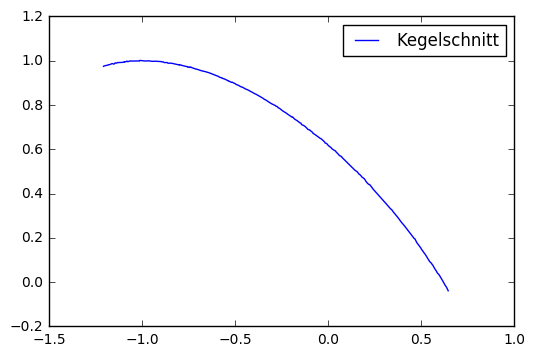

In [9]:
plot(data[0:200,0], data[0:200,1], label="Kegelschnitt") #plotten der daten mit plot(x,x,label="y(x)")
legend()
show() ################# es fehlt noch der Fit von diesen Daten -5

In [12]:
#LGS lösen auch möglich mit while schleife? aber wie? ausprobieren:
def f(x,y):
    x=V[:,0] #umbenennung der spalten
    y=V[:,1]
    np.dot(V)
    while true:
        A*x**2+B*x*y+C*y**2+D*x+E*y == 1 #funktion definieren
      
        return np.linalg(x,y,A,B,C,D,E)
print(x,y,A,B,C,D,E)
############# diese Werte A,B,C,D,E sind immer noch alte Werte von obiger Rechnung... Deiner Schleife funktioniert hier nicht, warum?

[ 0.9827333] [ 0.95673125] [ 0.95861779] [ 1.00987493] [ 1.02591762]


### <u>Zusatzaufgabe</u>

- Schreiben Sie eine Funktion `polyfit(x,y,N=0)`, welche fuer `L` Datenpunkte in den Feldern `x` und `y` die Koeffizienten `c` eines Polynoms 
$$
    y = p(x)= c_0 x^0 + c_1 x^1 + c_2 x^2 + \dots + c_N x^N
$$ 
`N`ten Grades findet, welches die Summe der quadratischen Abweichungen $\sum_l (p(x_l)-y_l)^2$ minimiert.
- Demonstrieren Sie die Funktion grafisch anhand von `L` $\gg$ `N` Punkten eines Polynoms, welche zufaellige Abweichungen in $x$ und $y$ Richtung aufweisen. *Hinweis* : `np.random.randn(N)` generiert ein Feld mit N standard normalverteilten Zufallszahlen)
- Finden Sie ein Polynom, welches die Daten der ersten Aufgabe gut beschreibt.

In [31]:
100% werder (^^)

SyntaxError: invalid syntax (<ipython-input-31-1b5f9c8bcfaf>, line 1)